In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.show()
plt.rcParams["figure.figsize"] = [16, 9]

In [3]:
pair = 'USDCUSDT'
trading_minutes_per_year = 365 * 24 * 60

CALIBRATION ON DATA FROM MAY 24

In [ ]:
df_05 = pd.read_csv('../data/'+pair+'/'+pair+'-1m-2024-05.csv')
df_05.columns=['time', 'open', 'high', 'low', 'close', 's1', 's2', 's3', 's4', 's5', 's6', 's7']
df_05.set_index('time', inplace=True)
df_05.index = pd.to_datetime(df_05.index, unit='ms')
df_05

,open,high,low,close,s1,s2,s3,s4,s5,s6,s7
time,,,,,,,,,,,
2024-05-01 00:01:00,1.0009,1.0009,1.0008,1.0008,102619.0,1714521719999,1.027090e+05,156,79096.0,7.916719e+04,0
2024-05-01 00:02:00,1.0008,1.0009,1.0008,1.0008,299416.0,1714521779999,2.996669e+05,265,113938.0,1.140405e+05,0
2024-05-01 00:03:00,1.0009,1.0009,1.0008,1.0009,102858.0,1714521839999,1.029493e+05,190,90419.0,9.050038e+04,0
2024-05-01 00:04:00,1.0008,1.0009,1.0008,1.0009,904865.0,1714521899999,9.056770e+05,253,881177.0,8.819701e+05,0
2024-05-01 00:05:00,1.0009,1.0011,1.0008,1.0010,4033123.0,1714521959999,4.036805e+06,457,3955628.0,3.959240e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 23:55:00,1.0010,1.0011,1.0010,1.0010,47330.0,1717199759999,4.737960e+04,155,22652.0,2.267692e+04,0
2024-05-31 23:56:00,1.0010,1.0011,1.0010,1.0010,9609.0,1717199819999,9.618865e+03,31,2565.0,2.567822e+03,0
2024-05-31 23:57:00,1.0010,1.0011,1.0010,1.0010,19793.0,1717199879999,1.981288e+04,34,857.0,8.579427e+02,0


In [5]:
df_may = df_05[['close']].copy()
df_may

,close
time,
2024-05-01 00:01:00,1.0008
2024-05-01 00:02:00,1.0008
2024-05-01 00:03:00,1.0009
2024-05-01 00:04:00,1.0009
2024-05-01 00:05:00,1.0010
...,...
2024-05-31 23:55:00,1.0010
2024-05-31 23:56:00,1.0010
2024-05-31 23:57:00,1.0010


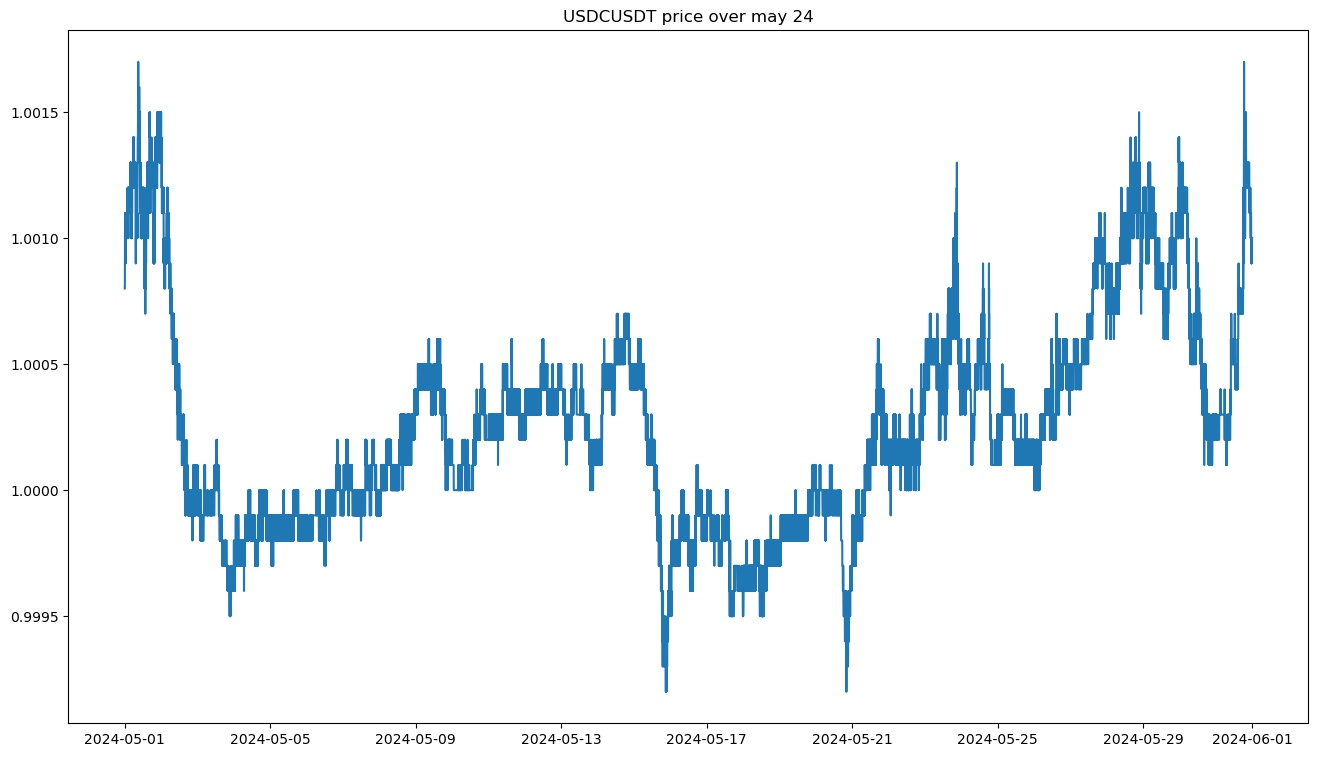

In [6]:
plt.plot(df_may.index.values, df_may['close'].values)
plt.title(pair+' price over may 24')
plt.show()

ORNSTEIN-UHLENBECK

In [7]:
import statsmodels.api as sm

X_t = df_may['close'].shift(1)
Y_t = df_may['close']

X_t = X_t.iloc[1:]
Y_t = Y_t.iloc[1:]

X_t = sm.add_constant(X_t)

model = sm.OLS(Y_t, X_t)
results = model.fit()

a = results.params[0]  
b = results.params[1]  

In [19]:
dt = 1/trading_minutes_per_year
kappa = -np.log(b) / dt


theta = a / (1 - np.exp(-kappa * dt))


sigma = np.std(results.resid) * np.sqrt(2 * kappa / (1 - b**2))

print(f"kappa: {kappa}")
print('kappa_daily:',sigma/365)
print(f"theta: {theta}")
print(f"sigma: {sigma}")
print('sigma_daily:',sigma/np.sqrt(365))

kappa: 5229.107163533937
kappa_daily: 0.00012901039040323588
theta: 1.0000416407805564
sigma: 0.0470887924971811
sigma_daily: 0.0024647400478911155


CALIBRATION ON DATA FROM JUNE 24


In [ ]:
df_06 = pd.read_csv('../data/'+pair+'/'+pair+'-1m-2024-06.csv')
df_06.columns=['time', 'open', 'high', 'low', 'close', 's1', 's2', 's3', 's4', 's5', 's6', 's7']
df_06.set_index('time', inplace=True)
df_06.index = pd.to_datetime(df_06.index, unit='ms')
df_06

,open,high,low,close,s1,s2,s3,s4,s5,s6,s7
time,,,,,,,,,,,
2024-06-01 00:01:00,1.0011,1.0011,1.0010,1.0010,40624.0,1717200119999,40667.9334,102,33094.0,33130.4034,0
2024-06-01 00:02:00,1.0010,1.0011,1.0010,1.0011,56002.0,1717200179999,56058.8859,67,8839.0,8848.7229,0
2024-06-01 00:03:00,1.0010,1.0011,1.0010,1.0011,233194.0,1717200239999,233441.1668,216,139728.0,139881.7008,0
2024-06-01 00:04:00,1.0011,1.0011,1.0010,1.0010,179447.0,1717200299999,179629.7087,133,32617.0,32652.8787,0
2024-06-01 00:05:00,1.0010,1.0011,1.0010,1.0010,222100.0,1717200359999,222342.6467,85,205467.0,205693.0137,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30 23:55:00,1.0015,1.0015,1.0014,1.0014,362498.0,1719791759999,363007.7073,90,22101.0,22134.1515,0
2024-06-30 23:56:00,1.0014,1.0015,1.0014,1.0014,71331.0,1719791819999,71435.1100,114,42466.0,42529.6990,0
2024-06-30 23:57:00,1.0014,1.0015,1.0014,1.0015,37751.0,1719791879999,37807.2331,50,33817.0,33867.7255,0


In [10]:
df_june = df_06[['close']].copy()
df_june

,close
time,
2024-06-01 00:01:00,1.0010
2024-06-01 00:02:00,1.0011
2024-06-01 00:03:00,1.0011
2024-06-01 00:04:00,1.0010
2024-06-01 00:05:00,1.0010
...,...
2024-06-30 23:55:00,1.0014
2024-06-30 23:56:00,1.0014
2024-06-30 23:57:00,1.0015


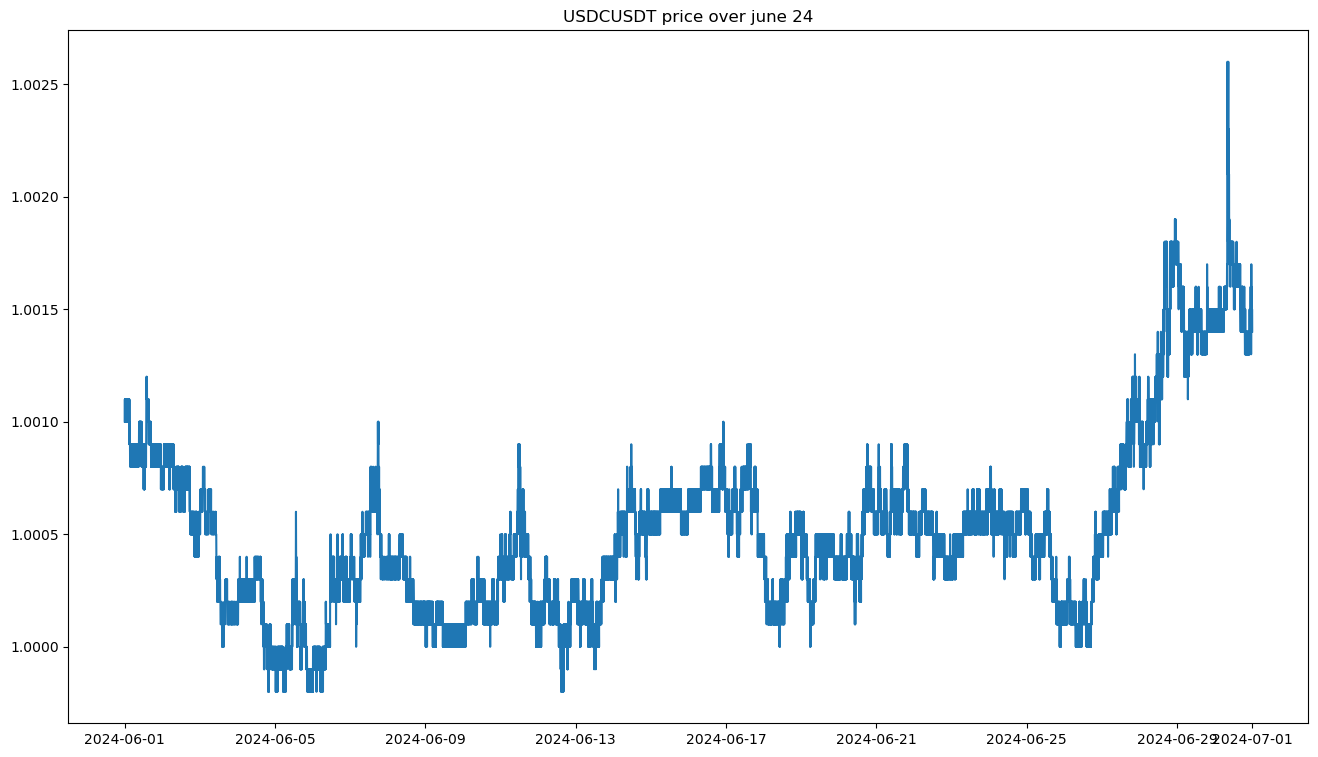

In [11]:
plt.plot(df_june.index.values, df_june['close'].values)
plt.title(pair+' price over june 24')
plt.show()

ORNSTEIN-UHLENBECK

In [12]:
import statsmodels.api as sm

X_t = df_june['close'].shift(1)
Y_t = df_june['close']

X_t = X_t.iloc[1:]
Y_t = Y_t.iloc[1:]

X_t = sm.add_constant(X_t)

model = sm.OLS(Y_t, X_t)
results = model.fit()

a = results.params[0]  
b = results.params[1]  

In [20]:
dt = 1/trading_minutes_per_year
kappa = -np.log(b) / dt


theta = a / (1 - np.exp(-kappa * dt))


sigma = np.std(results.resid) * np.sqrt(2 * kappa / (1 - b**2))

print(f"kappa: {kappa}")
print('kappa_daily:',sigma/365)
print(f"theta: {theta}")
print(f"sigma: {sigma}")
print('sigma_daily:',sigma/np.sqrt(365))

kappa: 5229.107163533937
kappa_daily: 0.00012901039040323588
theta: 1.0000416407805564
sigma: 0.0470887924971811
sigma_daily: 0.0024647400478911155


CALIBRATION ON DATA FROM JULY 24


In [ ]:
df_07 = pd.read_csv('../data/'+pair+'/'+pair+'-1m-2024-07.csv')
df_07.columns=['time', 'open', 'high', 'low', 'close', 's1', 's2', 's3', 's4', 's5', 's6', 's7']
df_07.set_index('time', inplace=True)
df_07.index = pd.to_datetime(df_07.index, unit='ms')
df_07

,open,high,low,close,s1,s2,s3,s4,s5,s6,s7
time,,,,,,,,,,,
2024-07-01 00:01:00,1.0014,1.0015,1.0014,1.0014,1040819.0,1719792119999,1.042278e+06,153,14504.0,14525.7560,0
2024-07-01 00:02:00,1.0015,1.0015,1.0014,1.0014,36742.0,1719792179999,3.679375e+04,118,3087.0,3091.6305,0
2024-07-01 00:03:00,1.0015,1.0015,1.0014,1.0014,76848.0,1719792239999,7.695763e+04,93,20393.0,20423.5895,0
2024-07-01 00:04:00,1.0014,1.0015,1.0014,1.0015,250340.0,1719792299999,2.506939e+05,172,34054.0,34105.0810,0
2024-07-01 00:05:00,1.0014,1.0015,1.0014,1.0014,129975.0,1719792359999,1.301619e+05,168,49534.0,49608.3010,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 23:55:00,1.0003,1.0003,1.0002,1.0003,51177.0,1722470159999,5.119164e+04,187,44027.0,44040.2081,0
2024-07-31 23:56:00,1.0002,1.0003,1.0002,1.0002,45234.0,1722470219999,4.524404e+04,129,9948.0,9950.9844,0
2024-07-31 23:57:00,1.0003,1.0003,1.0002,1.0002,175874.0,1722470279999,1.759132e+05,82,40510.0,40522.1530,0


In [15]:
df_july = df_07[['close']].copy()
df_july

,close
time,
2024-07-01 00:01:00,1.0014
2024-07-01 00:02:00,1.0014
2024-07-01 00:03:00,1.0014
2024-07-01 00:04:00,1.0015
2024-07-01 00:05:00,1.0014
...,...
2024-07-31 23:55:00,1.0003
2024-07-31 23:56:00,1.0002
2024-07-31 23:57:00,1.0002


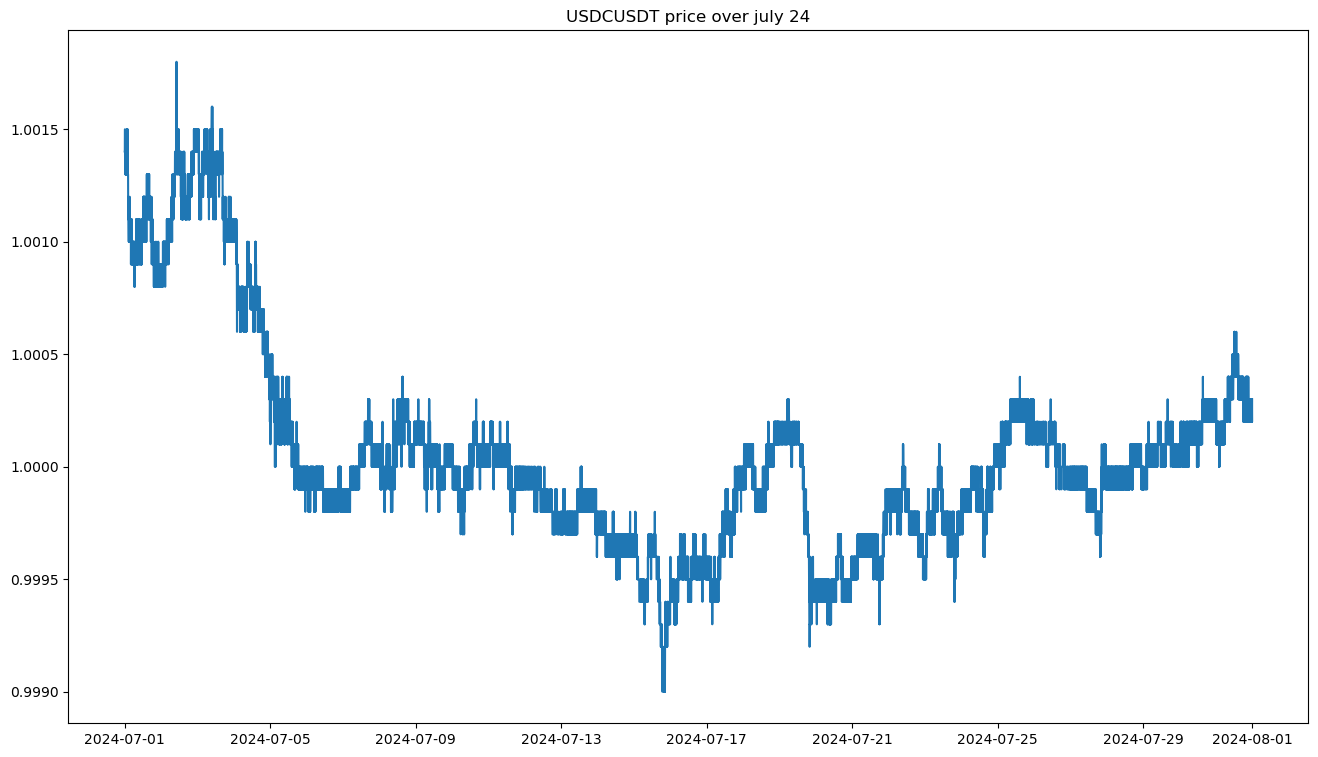

In [16]:
plt.plot(df_july.index.values, df_july['close'].values)
plt.title(pair+' price over july 24')
plt.show()

ORNSTEIN-UHLENBECK

In [17]:
import statsmodels.api as sm

X_t = df_july['close'].shift(1)
Y_t = df_july['close']

X_t = X_t.iloc[1:]
Y_t = Y_t.iloc[1:]

X_t = sm.add_constant(X_t)

model = sm.OLS(Y_t, X_t)
results = model.fit()

a = results.params[0]  
b = results.params[1]  

In [21]:
dt = 1/trading_minutes_per_year
kappa = -np.log(b) / dt


theta = a / (1 - np.exp(-kappa * dt))


sigma = np.std(results.resid) * np.sqrt(2 * kappa / (1 - b**2))

print(f"kappa: {kappa}")
print('kappa_daily:',sigma/365)
print(f"theta: {theta}")
print(f"sigma: {sigma}")
print('sigma_daily:',sigma/np.sqrt(365))

kappa: 5229.107163533937
kappa_daily: 0.00012901039040323588
theta: 1.0000416407805564
sigma: 0.0470887924971811
sigma_daily: 0.0024647400478911155
